<a href="https://colab.research.google.com/github/ShravanCan/fashion-mnist/blob/master/Ramana_Version_ECEN_758_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# SciKit learn imports
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm

print(tf.__version__)

# Load the dataset
- The dataset is loaded from Keras
- Images are flattened

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_image,train_label), (test_image,test_label) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


## Exploratory Data Analysis

In [ ]:
train_image.shape

(60000, 28, 28)

Defining class names for each class label index

In [ ]:
Class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Ploting the class distribution i.e. number of training samples in each class label

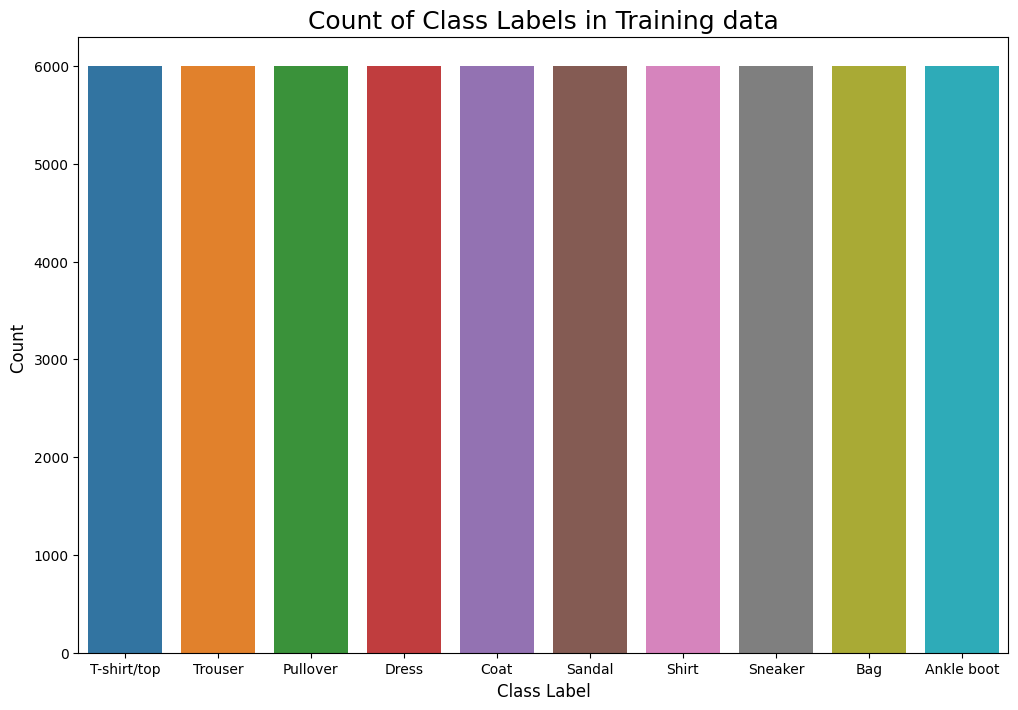

In [ ]:
plt.figure(figsize = (12,8))
classes_counts_Train = np.unique(train_label, return_counts = True)
sns.barplot(x = Class_names, y = classes_counts_Train[1])
plt.title('Count of Class Labels in Training data', fontsize = 18)
plt.xlabel('Class Label', fontsize = 12)
plt.ylabel('Count ', fontsize = 12)
plt.show()

Doing the same for test data

In [ ]:
test_image.shape

(10000, 28, 28)

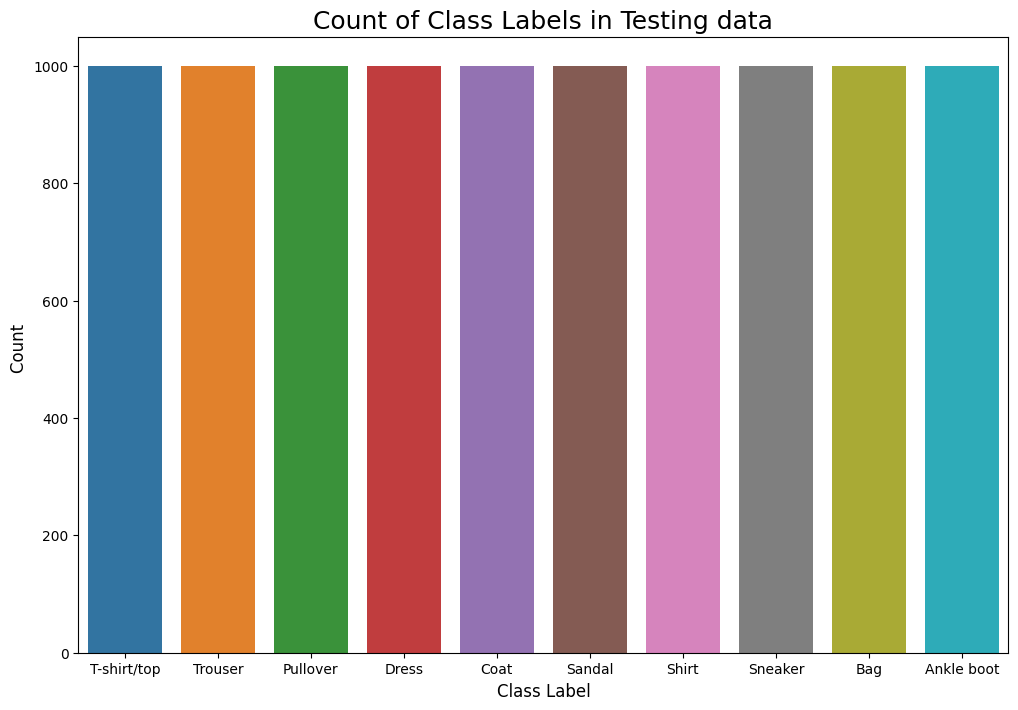

In [ ]:
#Barplot to find the count of images of each class in Training data
plt.figure(figsize = (12,8))
classes_counts_Test = np.unique(test_label, return_counts = True)
sns.barplot(x = Class_names, y = classes_counts_Test[1])
plt.title('Count of Class Labels in Testing data', fontsize = 18)
plt.xlabel('Class Label', fontsize = 12)
plt.ylabel('Count ', fontsize = 12)
plt.show()





In [ ]:
train_image.reshape(60000,784)
test_image.reshape(10000,784)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Models
# 1. CNN

### Train-Validation split

In [ ]:
X = train_image
y = to_categorical(train_label)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)
X_test = test_image
y_test = to_categorical(test_label)

In [ ]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)


X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255 #Standardizing the data to values between [0,1]

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

### Bulding Conv2D model with 1 convolution layer

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) #Choosing Relu activation
cnn1.add(MaxPooling2D(pool_size=(2, 2))) #Helps in reducing dimensionality of features
cnn1.add(Dropout(0.2)) #Adding dropout layer to reduce overfitting

cnn1.add(Flatten()) #Flattening 3D output to 1D for the dense layers

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

In [ ]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy']) # Selecting Adam optimizer and categorical_crossentropy as loss function

In [ ]:
gen = ImageDataGenerator(rotation_range=8,  #Values in degree to randomly rotate an image
                         width_shift_range=0.08, #Value to randomly translate pictures horizontally
                         shear_range=0.3,  #applying shearing transformations
                         height_shift_range=0.08, #Value to randomly translate pictures vertically
                         zoom_range=0.08) #randomly zooming inside pictures
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [ ]:
cnn1.summary() #Displaying architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

Here is a code block with 1 epoch for the grader to test the code

In [ ]:
history1 = cnn1.fit_generator(batches,
                              steps_per_epoch=48000//256, #
                              epochs=50,
                              validation_data=val_batches,
                              validation_steps=12000//256,
                              use_multiprocessing=True)

This is the model running for 50 epochs for increasing the performance of the model

In [ ]:
history1 = cnn1.fit_generator(batches,
                              steps_per_epoch=48000//256, #
                              epochs=50,
                              validation_data=val_batches,
                              validation_steps=12000//256,
                              use_multiprocessing=True)

Epoch 1/50


<ipython-input-12-8cb97d065783>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = cnn1.fit_generator(batches,


187/187 [==============================] - 43s 171ms/step - loss: 0.7520 - accuracy: 0.7261 - val_loss: 0.5792 - val_accuracy: 0.7870
Epoch 2/50
187/187 [==============================] - 28s 152ms/step - loss: 0.5292 - accuracy: 0.8051 - val_loss: 0.5094 - val_accuracy: 0.8134
Epoch 3/50
187/187 [==============================] - 27s 146ms/step - loss: 0.4794 - accuracy: 0.8216 - val_loss: 0.4547 - val_accuracy: 0.8342
Epoch 4/50
187/187 [==============================] - 29s 153ms/step - loss: 0.4509 - accuracy: 0.8326 - val_loss: 0.4401 - val_accuracy: 0.8387
Epoch 5/50
187/187 [==============================] - 32s 170ms/step - loss: 0.4274 - accuracy: 0.8420 - val_loss: 0.4375 - val_accuracy: 0.8406
Epoch 6/50
187/187 [==============================] - 32s 172ms/step - loss: 0.4148 - accuracy: 0.8460 - val_loss: 0.4059 - val_accuracy: 0.8499
Epoch 7/50
187/187 [==============================] - 27s 146ms/step - loss: 0.4023 - accuracy: 0.8507 - val_loss: 0.3970 - val_accuracy: 0.8

Checking Loss and Accuracy for CNN

In [ ]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.24881720542907715
Test accuracy: 0.9132000207901001


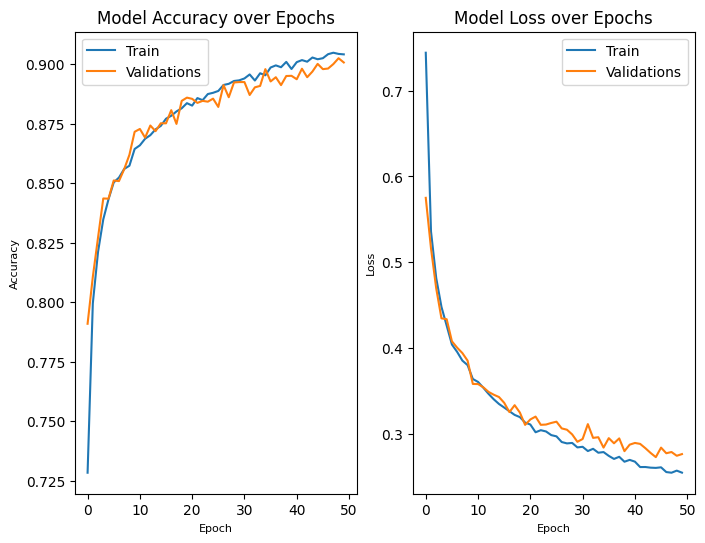

In [ ]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy over Epochs', fontsize = 12)
plt.xlabel('Epoch', fontsize = 8)
plt.ylabel('Accuracy', fontsize = 8)
plt.legend(['Train', 'Validations'], loc = 'upper left')


plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss over Epochs', fontsize = 12)
plt.xlabel('Epoch', fontsize = 8)
plt.ylabel('Loss', fontsize = 8)
plt.legend(['Train', 'Validations'], loc = 'upper right')


313/313 [==============================] - 1s 3ms/step


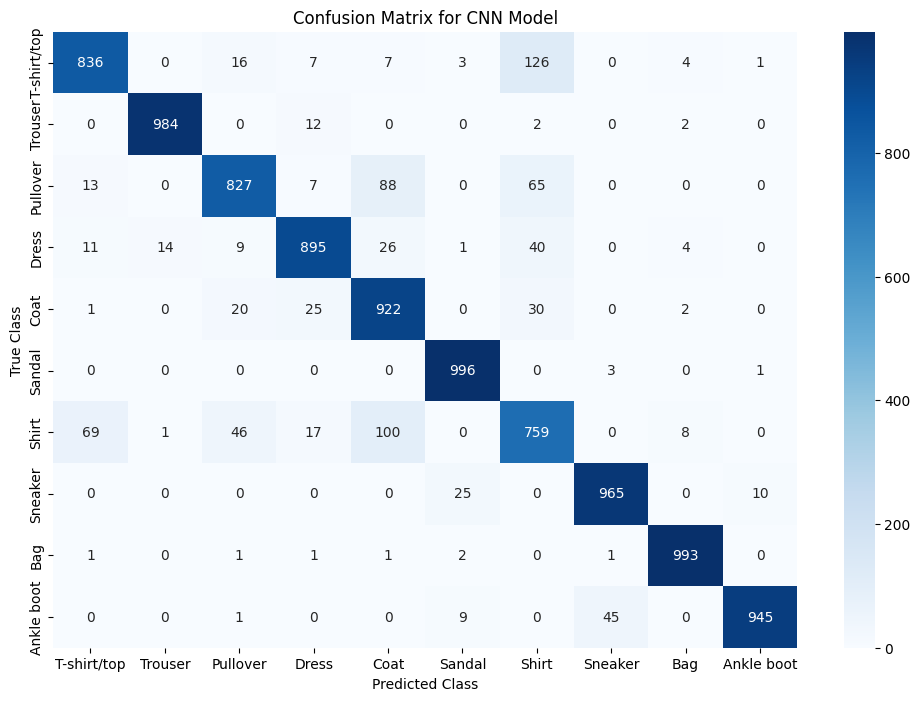

In [ ]:
CNN_predictions = cnn1.predict(X_test)
predicted_class = np.argmax(CNN_predictions, axis = 1)
actual_class = np.argmax(y_test, axis = 1)


#Confusion Matrix
conf_matrix = confusion_matrix(actual_class, predicted_class )

#plot confusion matrix
plt.figure(figsize = (12,8))
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues',fmt = 'd', xticklabels = Class_names, yticklabels = Class_names)
plt.title('Confusion Matrix for CNN Model', fontsize = 12)
plt.xlabel('Predicted Class', fontsize = 10)
plt.ylabel('True Class', fontsize = 10)
plt.show()





In [ ]:
report = classification_report(actual_class,predicted_class) #Evaluating the Model
print("Classification report for CNN:\n",report)

Classification report for CNN:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       0.98      0.98      0.98      1000
           2       0.90      0.83      0.86      1000
           3       0.93      0.90      0.91      1000
           4       0.81      0.92      0.86      1000
           5       0.96      1.00      0.98      1000
           6       0.74      0.76      0.75      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.99      0.99      1000
           9       0.99      0.94      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Summarizing the performance

In [ ]:
random_images = np.random.choice(range(len(X_test)), 12)
model_predictions = cnn1.predict(X_test[random_images])

plt.figure(figsize = (20,10))
for i, index in enumerate(random_images):
  plt.subplot(4,3,i+1)
  plt.imshow(X_test[index].reshape(28,28), cmap = 'gray')
  plt.title(f"True Class: {Class_names[np.argmax(y_test[index])]}, Predicted Class: {Class_names[np.argmax(model_predictions[i])]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

# 2. KNN

Standardizing the images data

In [ ]:
train_image=train_image.reshape(60000,784)
test_image=test_image.reshape(10000,784)

In [ ]:
scaler = StandardScaler()
train_images = scaler.fit_transform(train_image)
test_images = scaler.transform(test_image)

Splitting the Data

In [ ]:
train_images_split, val_images_split, train_labels_split, val_labels_split = train_test_split(
    train_images, train_label, test_size=0.2, random_state=42
)

Training the model

In [ ]:
k_value = 5  # You can adjust the value of k
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(train_images_split, train_labels_split)
val_predictions = knn_model.predict(val_images_split)


accuracy = accuracy_score(val_labels_split, val_predictions)
print(f'Accuracy on validation set: {accuracy * 100:.2f}%')


test_predictions = knn_model.predict(test_images)
test_accuracy = accuracy_score(test_label, test_predictions)
print(f'Accuracy on test set: {test_accuracy * 100:.2f}%')

Accuracy on validation set: 85.29%
Accuracy on test set: 85.16%


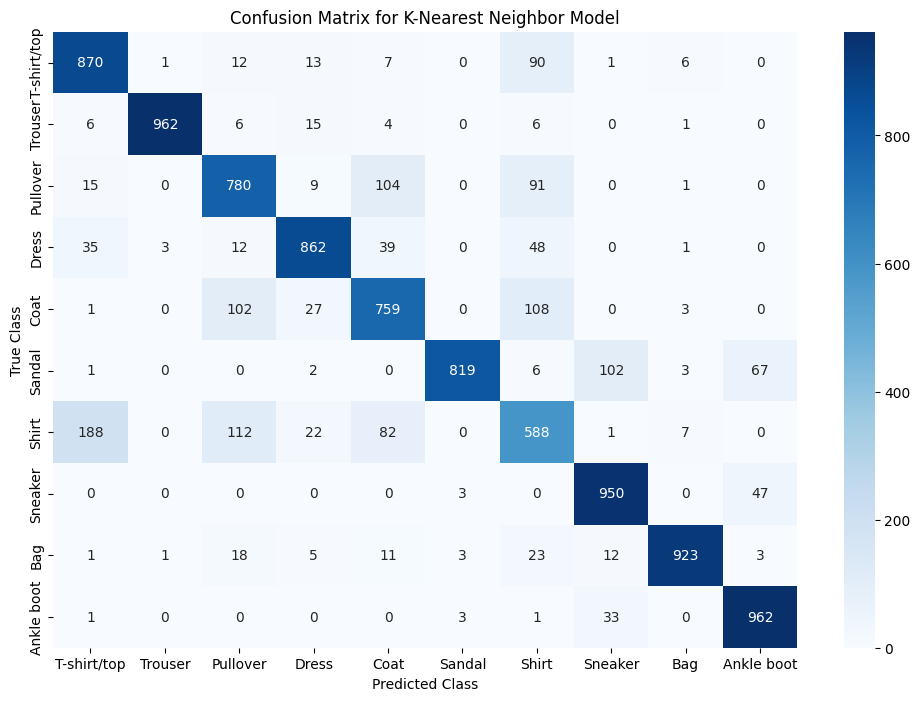

In [ ]:
from sklearn.metrics import  confusion_matrix
conf_mat1 = confusion_matrix(test_label, test_predictions)

plt.figure(figsize = (12,8))
sns.heatmap(conf_mat1, annot = True, cmap = 'Blues',fmt = 'd', xticklabels = Class_names, yticklabels = Class_names)
plt.title('Confusion Matrix for K-Nearest Neighbor Model')
plt.xlabel('Predicted Class', fontsize = 10)
plt.ylabel('True Class', fontsize = 10)
plt.show()

In [ ]:
report = classification_report(test_label, test_predictions,target_names = Class_names)
print("Classification report for K-Nearest Neighbours:\n",report)

Classification report for K-Nearest Neighbours:
               precision    recall  f1-score   support

 T-shirt/top       0.77      0.89      0.82      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.74      0.81      0.77      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.77      0.75      0.76      1000
      Sandal       0.99      0.85      0.91      1000
       Shirt       0.63      0.57      0.60      1000
     Sneaker       0.88      0.96      0.92      1000
         Bag       0.98      0.92      0.95      1000
  Ankle boot       0.91      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [ ]:
correct_predictions = np.where(test_predictions == test_label)[0]
incorrect_predictions = np.where(test_predictions != test_label)[0]

#Correct Predictions
plt.figure(figsize = (18,3))
for i, index in enumerate(correct_predictions[:5]):
  plt.subplot(1,5,i+1)
  plt.imshow(test_images[index].reshape(28,28), cmap = 'Greens')
  plt.title(f'Correct Prediction: {Class_names[test_predictions[index]]}')
  plt.axis('off')
plt.show()

#Incorrect Predictions
plt.figure(figsize = (20,3))
for i, index in enumerate(incorrect_predictions[:5]):
  plt.subplot(1,5,i+1)
  plt.imshow(test_images[index].reshape(28,28), cmap = 'Reds')
  plt.title(f'Incorrect : {Class_names[test_predictions[index]]} (Correct: {Class_names[test_label[index]]})')
  plt.axis('off')
plt.show()





### 3. SVM

In [ ]:
clf = svm.SVC(kernel='rbf', verbose=10)  # You can choose different kernels like 'linear', 'rbf', etc. We chose the rbf as it is better for non linear boundaries.
clf.fit(train_image, train_label)
predictions = clf.predict(test_images)
accuracy = accuracy_score(test_label, predictions)
print(f'Accuracy : {accuracy * 100:.2f}%')

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report

SVM_report = classification_report(test_label, predictions, target_names = Class_names)
print("Classification report for Support Vector Machine:\n", SVM_report)

Classification report for Support Vector Machine:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.80      0.81      0.81      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.80      0.82      0.81      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.72      0.65      0.68      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
conf_mat2 = confusion_matrix(test_label, predictions)

plt.figure(figsize = (12,8))
sns.heatmap(conf_mat2, annot = True, cmap = 'Blues',fmt = 'd', xticklabels = Class_names, yticklabels = Class_names)
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Class', fontsize = 10)
plt.ylabel('True Class', fontsize = 10)
plt.show()

In [ ]:
df4=pd.DataFrame(Test_data)
df5=pd.DataFrame(Test_label)
df6=pd.concat([df5,df4],axis=1)

In [ ]:
df3

In [ ]:
clothes = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

In [ ]:
fig, axes = plt.subplots(3, 4,figsize=(10,10))
for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = df3.iloc[index, 1:].values.reshape((28, 28))
        obj = df3.iloc[index, 0]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothes[obj])
        plt.tight_layout()